# Analiza danych - pokemony

## Wczytanie potrzebnych bibliotek

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as st

Biblioteka `pandas` - struktury danych i narzędzia do ich analizy

Biblioteka `numpy` - działania na wektorach i macierzach, algebra liniowa.

Biblioteka `matplotlib.pyplot` - rysowanie wykresów.

Biblioteka `os` - funkcje związane z systemem operacyjnym.

Biblioteka `scipy.stats` - rozkłady prawdopodobieństwa, funkcje statystyczne.

## Wczytanie danych

Na początek wczytamy dane z pliku `.csv`. Zapiszemy dane w zmiennej o nazwie `df`, od `Data Frame`. Korzystamy z funkcji `read_csv` biblioteki `pandas`. Jeżeli potrzebujemy podać separator, możemy podać argument `sep` lub `delimiter`, ale na ogół Python powinien sam wykryć separator (o ile separator ma długość 1).

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/AlicjaHol/pokemony/master/pokemon_data.csv")

Możemy także wczytać te same dane z plików tekstowych lub Excela. Dla pliku `.txt` możemy także użyć funkcji `read_csv`, jednak musimy ustawić `delimiter` jako (w tym przypadku) tabulator, czyli `\t`, bo domyślnym separatorem dla `.csv` jest przecinek (jak sama nazwa wskazuje, CSV = Comma Separated Values).

In [32]:
df_txt = pd.read_csv("https://raw.githubusercontent.com/AlicjaHol/pokemony/master/pokemon_data.txt", delimiter = "\t")

Dla plików `.xls` i `.xslx` istieje funkcja `read_excel`.

In [33]:
df_excel = pd.read_excel("pokemon_data.xlsx")

Nie musieliśmy podawać pełnej ścieżki dostępu do pliku, ponieważ:

In [34]:
os.getcwd()

'C:\\Users\\alaho\\Desktop\\Ala\\analiza_danych\\pokemony'

A zatem znajdujemy się w odpowiednim folderze. Gdybyśmy mieli inny folder roboczy (`getcwd()` = get current working directory), to trzeba by było podać pełną ścieżkę.

## Podstawowe działania na danych

Za pomocą funkcji `head()` możemy wyświetlić daną liczbę wierszy (od góry). Domyślnie jest to 5 wierszy. Analogicznie działa funkcja `tail()`, tyle że wyświetla końcowe wiersze.

In [25]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [26]:
df.tail(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [36]:
df_txt.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [37]:
df_excel.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Sprawdzimy, jakiego typu są poszczególne kolumny w ramce danych. `dtypes` zwraca nazwę kolumny oraz typ danych.

## Oczyszczenie danych

In [27]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

Nie ma potrzeby zmieniania typów danych.

Teraz wyświetlimy nazwy kolumn:

In [38]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

Aby uniknąć błędów związanych ze spacjami i kropkami w nazwach, zmienimy nazwy kolumn. Nie jest to konieczne, jeżeli będziemy pisać nazwy w cudzysłowie, to wszystko powinno działać. Ale jeśli "oczyścimy" nazwy kolumn, to znacząco ułatwimy sobie pracę.

In [43]:
df.columns = \
['Number', 'Name', 'Type1', 'Type2', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary']

In [44]:
df.head()

,Number,Name,Type1,Type2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Możemy też zobaczyć, w jaki sposób są nazwane wiersze, czyli wyświetlimy zakres indeksów.

In [45]:
df.index

RangeIndex(start=0, stop=800, step=1)

Sprawdzimy, czy są jakieś braki danych

In [76]:
pd.isna(df).sum()

Number          0
Name            0
Type1           0
Type2         386
HP              0
Attack          0
Defense         0
Sp_Atk          0
Sp_Def          0
Speed           0
Generation      0
Legendary       0
dtype: int64

Jak widać, braki występują tylko w kolumnie `Type2`. Nie wszystkie pokemony muszą mieć dwa typy, także wszystko ok.

Zatem mamy dane dla 800 pokemonów.

## Podstawowe statystyki

Wyświetlimy podstawowe statystyki opisowe dla danych.

In [46]:
df.describe()

,Number,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Możemy wybrać, które kwantyle mają być wyświetlone, za pomocą parametru `percentiles`.

In [47]:
df.describe(percentiles = [.1, .2, .5, .9])

,Number,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
10%,73.900000,40.000000,40.000000,40.000000,35.000000,40.000000,30.000000,1.00000
20%,147.800000,50.000000,50.000000,48.000000,45.000000,49.800000,41.000000,1.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
90%,651.100000,100.000000,125.000000,115.000000,120.000000,107.000000,106.000000,6.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Możemy także policzyć m. in. średnią dla poszczególnych kolumn (domyślnie funkcja `mean()` wybiera tylko kolumny numeryczne, tj. liczbowe albo logiczne).

In [54]:
df.mean()

Number        362.81375
HP             69.25875
Attack         79.00125
Defense        73.84250
Sp_Atk         72.82000
Sp_Def         71.90250
Speed          68.27750
Generation      3.32375
Legendary       0.08125
dtype: float64

In [178]:
df.median()

Number        364.5
HP             65.0
Attack         75.0
Defense        70.0
Sp_Atk         65.0
Sp_Def         70.0
Speed          65.0
Generation      3.0
Legendary       0.0
dtype: float64

## Odwoływanie się do poszczególnych kolumn, wierszy, komórek

Do danej kolumny możemy się odwołać na kilka sposobów.

Najłatwiej jest odwołać się do kolumny poprzez jej nazwę, to jest:

In [62]:
df.HP

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64

UWAGA! Powyższe polecenie zadziała tylko dla odpowiednio "oczyszczonych" nazw kolumn, tj. bez spacji i kropek.

Z kolei dla dowolnych nazw kolumn zadziała poniższe polecenie:

In [63]:
df['HP']

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64

Możemy się odwołać do kolumny poprzez jej numer. Przykładowo, patrząc na ramkę danych, widzimy, że kolumna `HP` ma indeks 4 (numeracja w Pythonie jest od zera). Należy użyć funkcji `iloc()` (integer location). Jako pierwszy argument podajemy numer wiersza (w naszym przypadku `:`, bo wybieramy wszystkie wiersze), jako drugi numer kolumny.

In [61]:
df.iloc[:,4]

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64

Możemy wyświetlić dane wiersze tabeli bez używania funkcji `iloc`.

In [67]:
df[7:28]

,Number,Name,Type1,Type2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
13,10,Caterpie,Bug,NaN,45,30,35,20,20,45,1,False
14,11,Metapod,Bug,NaN,50,20,55,25,25,30,1,False
15,12,Butterfree,Bug,Flying,60,45,50,90,80,70,1,False
16,13,Weedle,Bug,Poison,40,35,30,20,20,50,1,False


Używając funkcji `loc`, możemy się odnosić do kolumny nie tylko przez indeksy, ale także przez nazwy kolumn. Wyświetlimy w ten sposób całą kolumnę `Type1`.

In [68]:
df.loc[:, 'Type1']

0        Grass
1        Grass
2        Grass
3        Grass
4         Fire
        ...   
795       Rock
796       Rock
797    Psychic
798    Psychic
799       Fire
Name: Type1, Length: 800, dtype: object

Można wyświetlić kilka kolumn jednocześnie, wtedy należy je przekazać do funkcji `loc` jako listę.

Wyświetlimy kolumny `Type1` i `Type2` dla kilku wierszy.

In [69]:
df.loc[2:8, ['Type1', 'Type2']]

,Type1,Type2
2,Grass,Poison
3,Grass,Poison
4,Fire,NaN
5,Fire,NaN
6,Fire,Flying
7,Fire,Dragon
8,Fire,Flying


A teraz wyświetlmy tylko pokemony, dla których `Type1` to `Grass`.

In [71]:
df[df['Type1']== 'Grass']

,Number,Name,Type1,Type2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,45,50,55,75,65,30,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
718,650,Chespin,Grass,NaN,56,61,65,48,45,38,6,False
719,651,Quilladin,Grass,NaN,61,78,95,56,58,57,6,False
720,652,Chesnaught,Grass,Fighting,88,107,122,74,75,64,6,False
740,672,Skiddo,Grass,NaN,66,65,48,62,57,52,6,False


A teraz chcemy pokemony, dla których `Type1` to `Grass` lub `Fire`

In [72]:
df[df['Type1'].isin(['Grass', 'Fire'])]

,Number,Name,Type1,Type2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
735,667,Litleo,Fire,Normal,62,50,58,73,54,72,6,False
736,668,Pyroar,Fire,Normal,86,68,72,109,66,106,6,False
740,672,Skiddo,Grass,NaN,66,65,48,62,57,52,6,False
741,673,Gogoat,Grass,NaN,123,100,62,97,81,68,6,False


In [73]:
df[df.Type1.isin(['Grass', 'Fire'])]

,Number,Name,Type1,Type2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
735,667,Litleo,Fire,Normal,62,50,58,73,54,72,6,False
736,668,Pyroar,Fire,Normal,86,68,72,109,66,106,6,False
740,672,Skiddo,Grass,NaN,66,65,48,62,57,52,6,False
741,673,Gogoat,Grass,NaN,123,100,62,97,81,68,6,False


Możemy policzyć średnią lub inne statystyki dla konkretnych kolumn.

In [77]:
df.HP.mean()

69.25875

In [78]:
df.Sp_Atk.max()

194

## Funkcje agregujące

Grupujemy pokemony według `Type1` i sumujemy pozostałe cechy.

In [79]:
df.groupby('Type1').sum()

,Number,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
Type1,,,,,,,,,
Bug,23080,3925,4897,4880,3717,4471,4256,222,0.0
Dark,14302,2071,2740,2177,2314,2155,2361,125,2.0
Dragon,15180,2666,3588,2764,3099,2843,2657,124,12.0
Electric,15994,2631,3040,2917,3961,3243,3718,144,4.0
Fairy,7642,1260,1046,1117,1335,1440,826,70,1.0
Fighting,9824,1886,2613,1780,1434,1747,1784,91,0.0
Fire,17025,3635,4408,3524,4627,3755,3871,167,5.0
Flying,2711,283,315,265,377,290,410,22,2.0
Ghost,15568,2062,2361,2598,2539,2447,2059,134,2.0


Widzimy, że sumowanie dla kolumn `Number` i `Generation` jest bez sensu. Sumowanie kolumn od `HP` do `Speed` nie daje miarodajnych wyników, ponieważ w każdej podgrupie może znajdować się inna liczba pokemonów. Należałoby te wyniki uśrednić, dzieląc przez liczebności. Sumowanie w kolumnie `Legendary` dało nam informację, ile jest pokemonów legendarnych danego typu, ale także nie możemy porównać tej wartości między podgrupami, ze względu na różną liczebność.

Policzymy ile jest pokemonów danego typu.

In [83]:
df.groupby('Type1').count().Number

Type1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Number, dtype: int64

Zapiszemy liczebności w wektorze `n`.

In [173]:
n = df.groupby('Type1').size()

In [174]:
n = list(n)

In [175]:
n

[69, 31, 32, 44, 17, 27, 52, 4, 32, 70, 32, 24, 98, 28, 57, 44, 27, 112]

Ustalmy, dla których kolumn sumowanie w ogóle ma sens.

In [96]:
df.groupby('Type1').sum()[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Legendary']]

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Legendary
Type1,,,,,,,
Bug,3925,4897,4880,3717,4471,4256,0.0
Dark,2071,2740,2177,2314,2155,2361,2.0
Dragon,2666,3588,2764,3099,2843,2657,12.0
Electric,2631,3040,2917,3961,3243,3718,4.0
Fairy,1260,1046,1117,1335,1440,826,1.0
Fighting,1886,2613,1780,1434,1747,1784,0.0
Fire,3635,4408,3524,4627,3755,3871,5.0
Flying,283,315,265,377,290,410,2.0
Ghost,2062,2361,2598,2539,2447,2059,2.0


In [148]:
sumy = df.groupby('Type1').sum()[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Legendary']]

In [104]:
type(sumy)

pandas.core.frame.DataFrame

Widzimy, że otrzymaliśmy obiekt typu `Data Frame`.

In [140]:
nazwy_wierszy = sumy.index

In [163]:
srednie = []

In [164]:
for i in range(0, len(n)):
    srednie.append(sumy.loc[nazwy_wierszy[i]]/n[i])

Bardziej elegancki zapis pętli `for`.

In [169]:
srednie1 = []

In [170]:
for (i, typ) in enumerate(nazwy_wierszy):
    srednie1.append(sumy.loc[typ]/n[i])

Policzyliśmy w ten sposób średnie dla wszystkich typów pokemonów. Sprawdzimy, czy zgadzają się z tymi wyliczonymi przez funkcję `mean`.

In [165]:
srednie[0]

HP           56.884058
Attack       70.971014
Defense      70.724638
Sp_Atk       53.869565
Sp_Def       64.797101
Speed        61.681159
Legendary     0.000000
Name: Bug, dtype: float64

In [171]:
srednie1[0]

HP           56.884058
Attack       70.971014
Defense      70.724638
Sp_Atk       53.869565
Sp_Def       64.797101
Speed        61.681159
Legendary     0.000000
Name: Bug, dtype: float64

In [168]:
df[df.Type1=='Bug'].mean().loc[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Legendary']]

HP           56.884058
Attack       70.971014
Defense      70.724638
Sp_Atk       53.869565
Sp_Def       64.797101
Speed        61.681159
Legendary     0.000000
dtype: float64

Możemy grupować dane według kilku kolumn jednocześnie. Na przykład, pogrupujmy według `Type1` i `Type2`, i policzmy, ile wśród pokemonów danego typu 1 jest pokemonów o określonym typie 2.

In [177]:
df.groupby(['Type1', 'Type2']).size()

Type1  Type2   
Bug    Electric     2
       Fighting     2
       Fire         2
       Flying      14
       Ghost        1
                   ..
Water  Ice          3
       Poison       3
       Psychic      5
       Rock         4
       Steel        1
Length: 136, dtype: int64

## Dodawanie kolumny

Utworzymy nową kolumnę, dodamy ją do ramki danych i zapiszemy do pliku.

W nowej kolumnie zsumujemy wszystkie liczbowe parametry pokemona.

In [179]:
df['Total'] = df.HP + df.Attack + df.Defense + df.Sp_Atk + df.Sp_Def +df.Speed

In [180]:
df.head()

,Number,Name,Type1,Type2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


Dobrze jest sprawdzić, czy suma się zgadza.

In [181]:
45+49+49+65+65+45

318

Zapisywanie do pliku wykonujemy za pomocą funkcji `to_csv` lub `to_excel`. Ustawiamy parametr `index = False`, aby pozbyć się kolumny z indeksami.

In [184]:
df.to_csv("poke_modified.csv", index = False)

In [187]:
df.to_csv("poke_modified.txt", index = False, sep = "\t")

In [188]:
df.to_excel("poke_modified.xlsx", index = False)

Pliki powinny się pojawić w folderze, w którym pracujemy. Folder ten można zmienić przy użyciu np. polecenia `chdir` (change directory) z biblioteki `os`.

Teraz wybierzemy pokemony typu `Fire` i zapiszemy do pliku ramkę danych z tymi i tylko tymi pokemonami.

In [189]:
new_df = df[df.Type1 == 'Fire']

In [190]:
new_df.head()

,Number,Name,Type1,Type2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,Total
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634


Widzimy, że indeksy nie uległy zmianie, zatem zresetujemy je (inaczej praca na danych przy użyciu indeksów, np. odwoływanie się do odpowiednich wierszy, będzie problematyczne). `drop = True` usuwa stare indeksy, `inplace = True` oznacza "nie twórz nowego obiektu", zatem zmieniamy indeksy w istniejącej ramce `new_df`.

In [193]:
new_df.reset_index(drop = True, inplace  = True)

Zapisujemy do pliku `.csv`

In [195]:
new_df.to_csv("poke_only_fire.csv", index = False)

## Rysowanie

Dla zapoznania się z biblioteką `matplotlib` (a dokładniej `matplotlib.pyplot`), narysujemy wykres zależności szybkości pokemona od jego HP. Najpierw posortujemy dane względem `HP`.

In [196]:
df_sorted = df.sort_values('HP')

In [197]:
df_sorted.head()

,Number,Name,Type1,Type2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary,Total
316,292,Shedinja,Bug,Ghost,1,90,45,30,30,40,3,False,236
55,50,Diglett,Ground,NaN,10,55,25,35,45,95,1,False,265
139,129,Magikarp,Water,NaN,20,10,55,15,20,80,1,False,200
388,355,Duskull,Ghost,NaN,20,40,90,30,90,25,3,False,295
487,439,Mime Jr.,Psychic,Fairy,20,25,45,70,90,60,4,False,310


Domyślne sortowanie jest rosnące, aby to zmienić, musielibyśmy ustawić `ascending = False`.

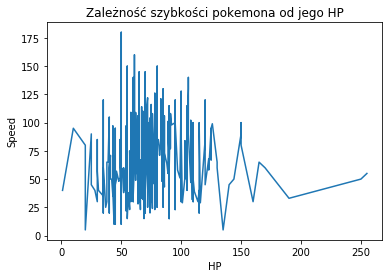

In [200]:
plt.plot(df_sorted['HP'], df_sorted['Speed'])
plt.xlabel('HP')
plt.ylabel('Speed')
plt.title('Zależność szybkości pokemona od jego HP')
plt.show()

Co prawda domyślamy się, że wykres nie jest do końca poprawny, ponieważ dla takiego samego `HP` możemy mieć po kilka różnych wartości `Speed`... ale zoabczyliśmy podstawowe komendy służące do rysowania.

## Testy statystyczne

Testy statystyczne można znaleźć np. w bibliotece `scipy.stats`.

Sprawdzimy, czy cecha `HP` ma rozkład normalny w populacji pokemonów.

In [203]:
W, p = st.shapiro(df.HP)

Funkcja `shapiro`, służąca do wykonania testu Shapiro-Wilka, zwraca wartość statystyki `W` oraz `p-value`. Nas będzie interesować przede wszystkim `p-value`.

In [204]:
p

1.1518300198312678e-20

P-value jest znacznie mniejsze od poziomu istotności (standardowo 0.05), zatem musimy odrzucić hipotezę o normalności rozkładu. Jest to ciekawe spostrzeżenie, bo ze względu na dużą liczność próbki można było się spodziewać, że rozkład dąży do normalnego.

In [207]:
st.normaltest(df.HP).pvalue

7.421639067361935e-67

Analogiczny wynik otrzymujemy przy pomocy testu `normaltest`.